In [1]:
import numpy as np
import tqdm
from tqdm import tqdm
import torch
import os
import segmentation_models_pytorch as smp

In [2]:
print(torch.cuda.is_available())
device = "cuda:0"

True


In [3]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, data_path, label_path):
        self.data_path = data_path
        self.label_path = label_path
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def __len__(self):
        return len(os.listdir(self.data_path))

    def __getitem__(self, idx):
        ct = np.load(os.path.join(self.data_path, f"{idx}.npy"))
        mask = np.load(os.path.join(self.label_path, f"{idx}.npy"))

        ct = torch.Tensor(ct).to(self.device)
        mask = torch.Tensor(mask).to(self.device)

        return ct, mask

class DataGenerator:
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self.ROOT_DATA_PATH = 'Task06_Lung/Preprocessed/train/data/'
        self.ROOT_LABEL_PATH = 'Task06_Lung/Preprocessed/train/label/'
        self.TEST_DATA_PATH = 'Task06_Lung/Preprocessed/test/data/'
        self.TEST_LABEL_PATH = 'Task06_Lung/Preprocessed/test/label/'

    def train_loader(self):
        dataset = CustomDataset(self.ROOT_DATA_PATH, self.ROOT_LABEL_PATH)
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

    def test_loader(self):
        dataset = CustomDataset(self.TEST_DATA_PATH, self.TEST_LABEL_PATH)
        return DataLoader(dataset, batch_size=1, shuffle=False)

In [4]:
# Set the batch size
batch_size = 8

# Create an instance of the DataGenerator
data_generator = DataGenerator(batch_size)

# Get the training DataLoader
train_loader = data_generator.train_loader()

# Get the testing DataLoader
test_loader = data_generator.test_loader()

# # Iterate through the training DataLoader
# for batch_idx, (ct, mask) in enumerate(train_loader):
#     # Your training code here
#     print(f"Batch {batch_idx + 1}: CT Shape: {ct.shape}, Mask Shape: {mask.shape}")

# # # Iterate through the testing DataLoader
# # for batch_idx, (ct, mask) in enumerate(test_loader):
# #     # Your testing code here
# #     print(f"Batch {batch_idx + 1}: CT Shape: {ct.shape}, Mask Shape: {mask.shape}")


In [5]:
# class DataGenerator:
#     def __init__(self, batch_size):
#         self.batch_size = batch_size
#         self.ROOT_DATA_PATH = 'Task06_Lung/Preprocessed/train/data/'
#         self.ROOT_LABEL_PATH = 'Task06_Lung/Preprocessed/train/label/'
#         self.TEST_DATA_PATH = 'Task06_Lung/Preprocessed/test/data/'
#         self.TEST_LABEL_PATH = 'Task06_Lung/Preprocessed/test/label/'

#     def __len__(self):
#         for _, __, files in os.walk(self.ROOT_DATA_PATH):
#             return len(files)

#     def train_generate(self, size):
#         while True:
#             batch_count = 0
#             yield_list = []
#             for i in range(size):
#                     ct = np.load(self.ROOT_DATA_PATH + str(i) + ".npy")
#                     mask = np.load(self.ROOT_LABEL_PATH + str(i) + ".npy")

#                     ct = torch.Tensor(ct)
#                     mask = torch.Tensor(mask)
#                     ct = ct.to(device)
#                     mask = mask.to(device)
                    
#                     yield_list.append([ct, mask])
#                     batch_count += 1

#                     if batch_count == self.batch_size:
#                         yield yield_list
#                         batch_count = 0
#                         yield_list = []

#     def test_generate(self):
#         for _, __, files in os.walk(self.TEST_DATA_PATH):
#             for file in files:
#                 ct = np.load(self.TEST_DATA_PATH + file)
#                 mask = np.load(self.TEST_LABEL_PATH + file)

#                 ct = torch.Tensor(ct)
#                 mask = torch.Tensor(mask)
#                 ct = ct.to(device)
#                 mask = mask.to(device)
                    
#                 yield [[ct, mask]]         

In [6]:
# %%timeit
# datagen = DataGenerator(batch_size=1)
# iter = datagen.train_generate(datagen.__len__()) 
# data = next(iter)
# print(data[0][0], data[0][1])

In [7]:
# datagen = DataGenerator(batch_size=1)
# iter = datagen.test_generate() 
# data = next(iter)
# print(data[0][0], data[0][1])

In [8]:
# data[0][1]

In [9]:
# # for row in data[0][0]:
# #     print(row)

# data[0][0].shape

In [10]:
# type(data[0][0])

In [11]:
# len(data)

In [12]:
# import torch

# class DoubleConv(torch.nn.Module):
#     """
#     Helper Class which implements the intermediate Convolutions
#     """
#     def __init__(self, in_channels, out_channels):
        
#         super().__init__()
#         self.step = torch.nn.Sequential(torch.nn.Conv2d(in_channels, out_channels, 3, padding=1),
#                                         torch.nn.ReLU(),
#                                         torch.nn.Conv2d(out_channels, out_channels, 3, padding=1),
#                                         torch.nn.ReLU())
        
#     def forward(self, X):
#         return self.step(X)


# class UNet(torch.nn.Module):
#     """
#     This class implements a UNet for the Segmentation
#     We use 3 down- and 3 UpConvolutions and two Convolutions in each step
#     """

#     def __init__(self):
#         """Sets up the U-Net Structure
#         """
#         super().__init__()
        
        
#         ############# DOWN #####################
#         self.layer1 = DoubleConv(1, 64)
#         self.layer2 = DoubleConv(64, 128)
#         self.layer3 = DoubleConv(128, 256)
#         self.layer4 = DoubleConv(256, 512)

#         #########################################

#         ############## UP #######################
#         self.layer5 = DoubleConv(512 + 256, 256)
#         self.layer6 = DoubleConv(256+128, 128)
#         self.layer7 = DoubleConv(128+64, 64)
#         self.layer8 = torch.nn.Conv2d(64, 1, 1)
#         #########################################

#         self.maxpool = torch.nn.MaxPool2d(2)

#     def forward(self, x):
        
#         ####### DownConv 1#########
#         x1 = self.layer1(x)
#         x1m = self.maxpool(x1)
#         ###########################
        
#         ####### DownConv 2#########        
#         x2 = self.layer2(x1m)
#         x2m = self.maxpool(x2)
#         ###########################

#         ####### DownConv 3#########        
#         x3 = self.layer3(x2m)
#         x3m = self.maxpool(x3)
#         ###########################
        
#         ##### Intermediate Layer ## 
#         x4 = self.layer4(x3m)
#         ###########################

#         ####### UpCONV 1#########        
#         x5 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x4)  # Upsample with a factor of 2
#         x5 = torch.nn.ConvTranspose2d(512, 512, 2, 2)(x4)
#         x5 = torch.cat([x5, x3], dim=1)  # Skip-Connection
#         x5 = self.layer5(x5)
#         ###########################

#         ####### UpCONV 2#########        
#         x6 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x5)        
#         x6 = torch.nn.ConvTranspose2d(256, 256, 2, 2)(x5)
#         x6 = torch.cat([x6, x2], dim=1)  # Skip-Connection    
#         x6 = self.layer6(x6)
#         ###########################
        
#         ####### UpCONV 3#########        
#         x7 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x6)
#         x7 = torch.nn.ConvTranspose2d(128, 128, 2, 2)(x6)
#         x7 = torch.cat([x7, x1], dim=1)       
#         x7 = self.layer7(x7)
#         ###########################
        
#         ####### Predicted segmentation#########        
#         ret = self.layer8(x7)
#         return ret

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

In [14]:
# model = UNet()
model =  smp.Unet(
    encoder_name="efficientnet-b5",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# criterion = torch.nn.BCEWithLogitsLoss()
criterion = DiceLoss()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b5-b6417697.pth" to C:\Users\kiree/.cache\torch\hub\checkpoints\efficientnet-b5-b6417697.pth
100%|██████████| 117M/117M [00:18<00:00, 6.66MB/s] 


In [15]:
data = np.random.rand(1,1,256,256)
data = torch.Tensor(data)
data

tensor([[[[0.1541, 0.6162, 0.0733,  ..., 0.1693, 0.9563, 0.8913],
          [0.4653, 0.3144, 0.2861,  ..., 0.0401, 0.0477, 0.4409],
          [0.0695, 0.8208, 0.9981,  ..., 0.5668, 0.5432, 0.4889],
          ...,
          [0.8208, 0.7369, 0.4432,  ..., 0.4462, 0.2436, 0.1346],
          [0.7800, 0.8428, 0.2980,  ..., 0.2651, 0.7002, 0.3577],
          [0.5527, 0.3039, 0.9127,  ..., 0.0523, 0.7948, 0.3985]]]])

In [16]:
# from fvcore.nn import FlopCountAnalysis
# flops = FlopCountAnalysis(model, train_loader[0])
# flops.total() // 1e-9

In [17]:
# flops.by_operator()

In [18]:
# flops.by_module()

In [19]:
# flops.by_module_and_operator()

In [20]:
torch.device(device=device)

device(type='cuda', index=0)

In [21]:
model = model.to(device)

In [22]:
# size = datagen.__len__()
size = train_loader.__len__()
size

436

In [23]:
EPOCH = 10

In [24]:
for epoch in range(EPOCH):
    model.train()  # Set the model to training mode
    total_loss = 0.0

    for batch_idx, (ct, mask) in enumerate(train_loader):
        # Move data to the appropriate device
        ct, mask = ct.to(device), mask.to(device)

        # Forward pass
        outputs = model(ct)
        # outputs = 1 if outputs > 0.5 else 0

        # Compute the loss
        loss = criterion(outputs, mask)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print average loss for the epoch
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{EPOCH}, Average Loss: {average_loss:.4f}")


Epoch 1/10, Average Loss: 0.5134
Epoch 2/10, Average Loss: 0.3176
Epoch 3/10, Average Loss: 0.2900
Epoch 4/10, Average Loss: 0.2429
Epoch 5/10, Average Loss: 0.2389
Epoch 6/10, Average Loss: 0.2574
Epoch 7/10, Average Loss: 0.8758
Epoch 8/10, Average Loss: 0.9773
Epoch 9/10, Average Loss: 0.9801
Epoch 10/10, Average Loss: 0.9833


In [25]:
# for epoch in range(EPOCH):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, (ct, mask) in tqdm(enumerate(train_loader)):
        
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(ct)
#         # labels = labels.cpu().numpy()
#         loss = loss_fn(outputs, mask)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss = 0.0

#         if i == size:
#             break


# print('Finished Training')

In [26]:
class DiceScore(torch.nn.Module):
    """
    class to compute the Dice Loss
    """
    def __init__(self):
        super().__init__()

    def forward(self, pred, mask):

        #flatten label and prediction tensors
        pred = torch.flatten(pred)
        mask = torch.flatten(mask)

        counter = (pred * mask).sum()  # Counter
        print(counter)
        denum = pred.sum() + mask.sum()
        print(denum)  # denominator
        dice = (2*counter)/denum

        return dice


In [27]:
preds = []
labels = []

for batch_idx, (ct, mask) in enumerate(test_loader):

    ct, mask = ct.to(device), mask.to(device)
        
    with torch.no_grad():
        pred = model(ct)
        
    pred = pred.cpu().numpy()
    pred = np.where(pred < 0.5, 0, 1)

    preds.append(pred)
    labels.append(mask.cpu().numpy())
    
preds = np.array(preds)
labels = np.array(labels)

In [28]:
dice_score = DiceScore()(torch.from_numpy(preds), torch.from_numpy(labels))
print(f"The Val Dice Score is: {dice_score}")

tensor(0.)
tensor(46256.7500)
The Val Dice Score is: 0.0


In [29]:
preds

array([[[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       ...,



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0

In [30]:
labels

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       ...,



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
     

In [31]:
preds[0].sum()

0

In [32]:
labels[0].sum()

0.0

In [33]:
for i in range(len(preds)):
    if preds[i].sum() > 0:
        print(preds[i].sum(), labels[i].sum())

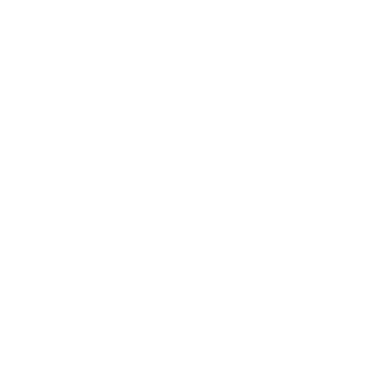

In [34]:
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure()
camera = Camera(fig)

for i in range(len(preds)):  # axial view
    plt.imshow(preds[i][0, 0, :, :], cmap="bone")
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())

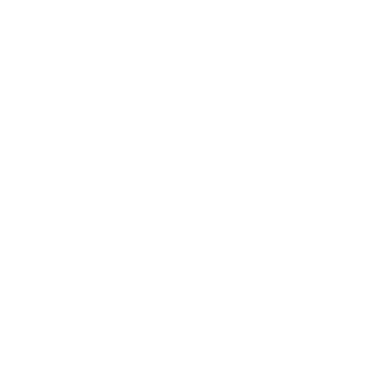

In [35]:
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure()
camera = Camera(fig)

for i in range(len(preds)):  # axial view
    plt.imshow(labels[i][0, 0, :, :], cmap="bone")
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())